# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json

In [3]:
# Import API key
from api_keys import api_key
    

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

## Generate Cities List

In [4]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],})

samplecity = citypd.sample(500)
samplecity

,city,country
175,paso de carrasco,uy
168,parral,cl
0,vaini,to
3723,ribeira grande,pt
7450,bogovarovo,ru
1533,sao miguel,br
287,perth,au
1495,meulaboh,id
6378,okhtyrka,ua
2302,quepos,cr


In [6]:
# Save dataframe to csv file
citypd.to_csv("CitiesWeatherInfo.csv")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
apikey = api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

C:\Users\halcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\halcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\halcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\halcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\halcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\halcm\Anaconda3\lib\s

This is city#: 1
This is: paso de carrasco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=paso de carrasco
This is city#: 2
This is: parral
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=parral
This is city#: 3
This is: vaini
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=vaini
This is city#: 4
This is: ribeira grande
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=ribeira grande
This is city#: 5
This is: bogovarovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=bogovarovo
This is city#: 6
This is: sao miguel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4

This is city#: 48
This is: ivankiv
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=ivankiv
This is city#: 49
This is: gboko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=gboko
This is city#: 50
This is: burlington
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=burlington
This is city#: 51
This is: alampur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=alampur
This is city#: 52
This is: boffa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=boffa
This is city#: 53
This is: serabu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&

No data for this city: karamay
This is city#: 95
This is: karamay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=karamay
This is city#: 96
This is: niteroi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=niteroi
This is city#: 97
This is: gorin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=gorin
This is city#: 98
This is: guantanamo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=guantanamo
This is city#: 99
This is: buin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=buin
This is city#: 100
This is: dallas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445

This is city#: 143
This is: lugovoy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=lugovoy
No data for this city: aakirkeby
This is city#: 144
This is: aakirkeby
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=aakirkeby
No data for this city: paucartambo
This is city#: 145
This is: paucartambo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=paucartambo
This is city#: 146
This is: valkeakoski
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=valkeakoski
No data for this city: wau
This is city#: 147
This is: wau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=wau
This is city#: 148
This is: talta

This is city#: 190
This is: drabiv
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=drabiv
This is city#: 191
This is: manono
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=manono
No data for this city: zabinka
This is city#: 192
This is: zabinka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=zabinka
This is city#: 193
This is: nushki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=nushki
This is city#: 194
This is: indianola
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=indianola
This is city#: 195
This is: nazarovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?

This is city#: 237
This is: dandong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=dandong
This is city#: 238
This is: lyubech
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=lyubech
This is city#: 239
This is: narsaq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=narsaq
This is city#: 240
This is: wuchang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=wuchang
This is city#: 241
This is: algodones
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=algodones
This is city#: 242
This is: massa marittima
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136ad

This is city#: 282
This is: emilio carranza
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=emilio carranza
This is city#: 283
This is: kachiry
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=kachiry
This is city#: 284
This is: lexington
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=lexington
This is city#: 285
This is: pangai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=pangai
This is city#: 286
This is: zemio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=zemio
This is city#: 287
This is: ribas do rio pardo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid

This is city#: 329
This is: bangkalan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=bangkalan
This is city#: 330
This is: goryachegorsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=goryachegorsk
This is city#: 331
This is: kasongo-lunda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=kasongo-lunda
This is city#: 332
This is: grimshaw
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=grimshaw
This is city#: 333
This is: yuza
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=yuza
This is city#: 334
This is: uarini
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4

This is city#: 375
This is: bandundu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=bandundu
This is city#: 376
This is: vendome
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=vendome
This is city#: 377
This is: price
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=price
This is city#: 378
This is: nizhnyaya salda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=nizhnyaya salda
This is city#: 379
This is: tukums
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=tukums
This is city#: 380
This is: dapdap
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136a

This is city#: 423
This is: tupelo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=tupelo
This is city#: 424
This is: bartica
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=bartica
This is city#: 425
This is: jacqueville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=jacqueville
This is city#: 426
This is: elat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=elat
This is city#: 427
This is: north augusta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=north augusta
This is city#: 428
This is: galesong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f13

This is city#: 470
This is: caramay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=caramay
This is city#: 471
This is: gualaco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=gualaco
This is city#: 472
This is: greenville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=greenville
This is city#: 473
This is: diamantina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=diamantina
This is city#: 474
This is: hurricane
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f136adfd7060333389268774&units=Metric&q=hurricane
This is city#: 475
This is: yazman
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=445c7c81f

In [8]:
samplecity.dtypes

city           object
country        object
latitude       object
longitude      object
temperature    object
humidity       object
cloudiness     object
wind_speed     object
dtype: object

In [18]:
# lat=pd.Series(samplecity['latitude'])
# pd.to_numeric(lat)
# long=pd.Series(samplecity['longitude'])
# pd.to_numeric(long)
samplecity['temp']=pd.to_numeric(samplecity['temperature'])
# humid=pd.Series(samplecity['humidity'])
samplecity['humid']=pd.to_numeric(samplecity['humidity'])
# cloud=pd.Series(samplecity['cloudiness'])
samplecity['cloud']=pd.to_numeric(samplecity['cloudiness'])
# wind=pd.Series(samplecity['wind_speed'])
samplecity['wind']=pd.to_numeric(samplecity['wind_speed'])

In [19]:
samplecity.dtypes

city            object
country         object
latitude        object
longitude       object
temperature     object
humidity        object
cloudiness      object
wind_speed      object
temp           float64
humid          float64
cloud          float64
wind           float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

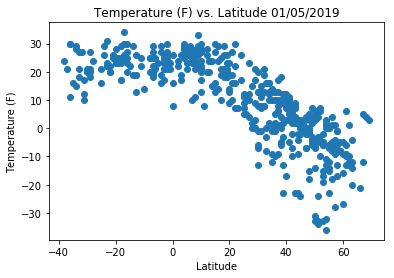

In [17]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'], samplecity['temp'])
# samplecity['temperature']
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

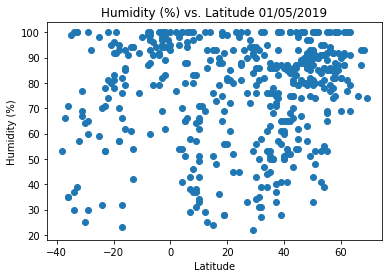

In [21]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humid'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

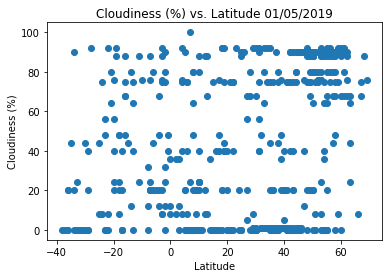

In [22]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloud'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

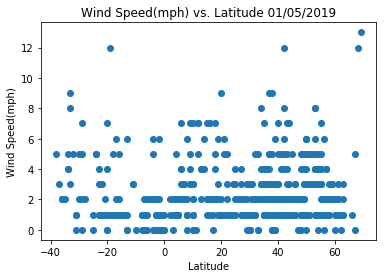

In [23]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Wind_Speed.png")
plt.show()